GTTACACTGCGGACGATGGTTAGTAGGATGACTTCCCTATCAATGCTACACATAAAAGAAACCGAGGAAATGTACGCTATGACGCCGTGGCGGGTCGTGCAGGTAAGTCATCACAAACTCATTATTGAAACCCGTCAAACGGGGGGAGCGCCAAACTTAAATGGACACCCATTGTGTATTAAGCCCTCCCGTATTGGACCAAAAGCCACTTCGTATCAAGATATCCCGCATCAGGCATTTAACTTTAGGCGGCCGTTTCGGCTAGATCTACATTCGTCGGTGAAAGAACCTCTCACTAGATTGGAAATCGATTGGCGGCAGGACGGGCTCCTGGGTCCTCTGTTAATCTCAGTAGGACGCGAGGGAGAAACCAATCTGAATCAACGCCAGGGGCAGCGTAATGCTAGTGACTTTTCATTCTCTAATTGCTCTAGCAATAGAACTCGTCGGACGAGGTATAAGTCTATAGTGGTTACCATTAGTATGTTACTGCAGGCTCGTCGTCCCGACTGTTTCCATCCACCCAACTCTCGGCCCTCGGAAGGGGCCCCCCTCTGTTATCTTTGGGAATTCAATCCACTAAAGGGGGAAAGCCTATAA

GUUACACUGCGGACGAUGGUUAGUAGGAUGACUUCCCUAUCAAUGCUACACAUAAAAGAAACCGAGGAAAUGUACGCUAUGACGCCGUGGCGGGUCGUGCAGGUAAGUCAUCACAAACUCAUUAUUGAAACCCGUCAAACGGGGGGAGCGCCAAACUUAAAUGGACACCCAUUGUGUAUUAAGCCCUCCCGUAUUGGACCAAAAGCCACUUCGUAUCAAGAUAUCCCGCAUCAGGCAUUUAACUUUAGGCGGCCGUUUCGGCUAGAUCUACAUUCGUCGGUGAAAGAACCUCUCACUAGAUUGGAAAUCGAUUGGCGGCAGGACGGGCUCCUGGGUCCUCUGUUAAUCUCAGUAGGACGCGAGGGAGAAACCAAUCUGAAUCAACGCCAGGGGCAGCG

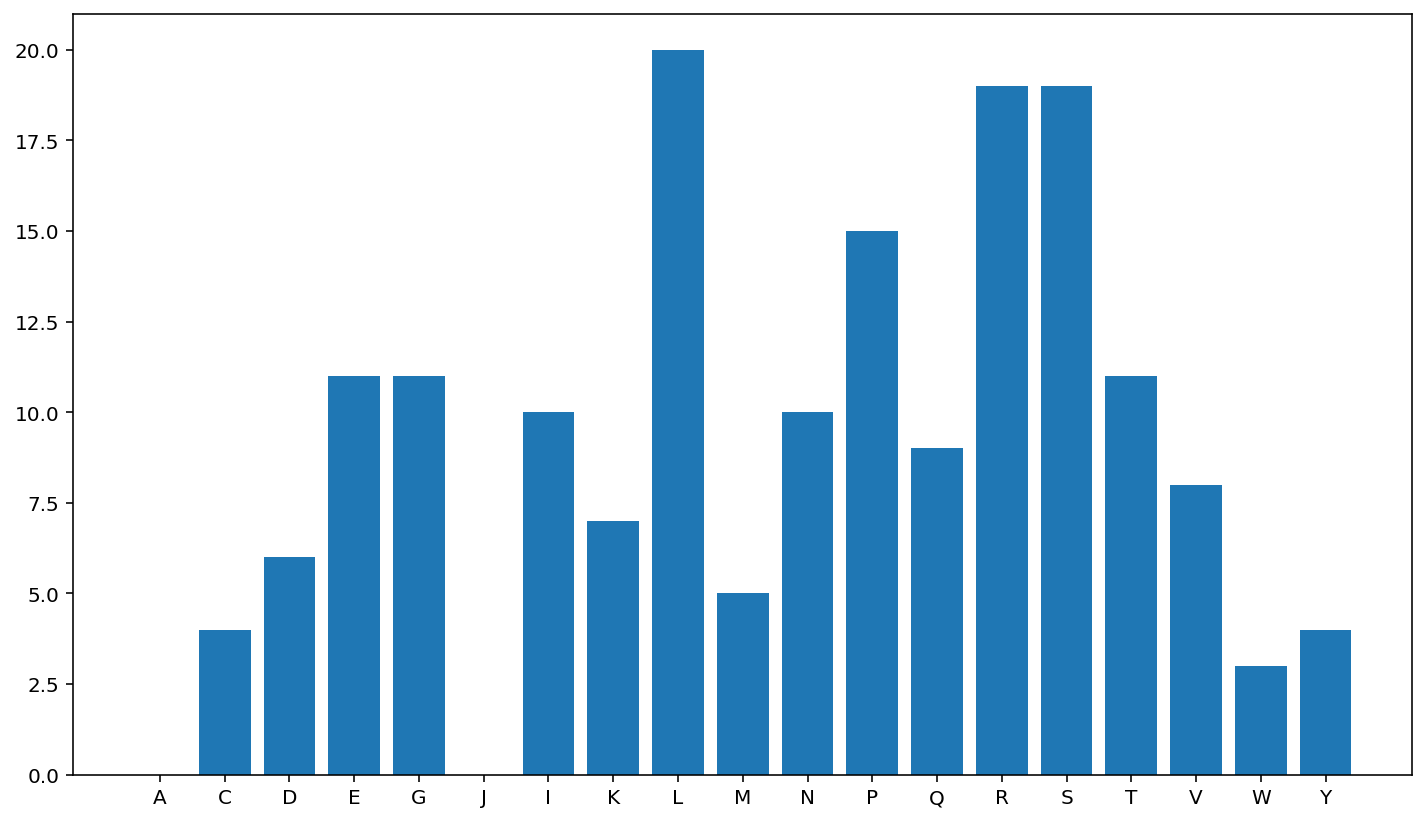

In [19]:
# Function to read a fasta file and return the DNA sequence
def read_fasta(file_name):
    with open(file_name) as f:
        sequence = ""
        for line in f:
            if line[0] != ">":
                sequence = sequence + line.rstrip()
    return sequence

# Function to transcribe DNA to RNA
def dna_to_rna(dna_sequence):
    rna_sequence = dna_sequence.replace("T", "U")
    return rna_sequence

# Function to extract the RNA between the 'start' and 'stop' codons
def extract_sequence(rna_sequence):
    sequence = []
    n = len(rna_sequence)
    for i in range(n - 3):
        if rna_sequence[i:i + 3] == "AUG":
            j = i + 3
            break
    for i in range(j, n-3, 3):
        codon = rna_sequence[i:i+3]
        if codon == "UAG" or codon == "UAA" or codon == "UGA":
            break
        else:
            sequence.append(codon)
    return sequence

def translate_sequence(rna_sequence):
    genetic_code  = {"GCA":"A", "GCC":"A", "GCG":"A", "GCU":"A",
                 "UGC":"C", "UGU":"C", "GAC":"D", "GAU":"D",
                 "GAA":"E", "GAG":"E", "UUC":"F", "UUU":"F",
                 "GGA":"G", "GGC":"G", "GGG":"G", "GGU":"G",
                 "CAC":"H", "CAU":"H", "AUA":"I", "AUC":"I",
                 "AUU":"I", "AAA":"K", "AAG":"K", "UUA":"L",
                 "UUG":"L", "CUA":"L", "CUC":"L", "CUG":"L",
                 "CUU":"L", "AUG":"M", "AAC":"N", "AAU":"N",
                 "CCA":"P", "CCC":"P" ,"CCG":"P", "CCU":"P",
                 "CAA":"Q", "CAG":"Q", "AGA":"R", "AGG":"R",
                 "CGA":"R", "CGC":"R", "CGU":"R", "CGG":"R",
                 "AGC":"S", "AGU":"S", "UCA":"S", "UCC":"S",
                 "UCG":"S", "UCU":"S", "ACA":"T", "ACC":"T",
                 "ACG":"T", "ACU":"T", "GUA":"V", "GUC":"V",
                 "GUG":"V", "GUU":"V", "UGG":"W", "UAC":"Y",
                 "UAU":"Y", "UAG":"!", "UAA":"!", "UGA":"!"}
    protein = ""
    for codon in rna_sequence:
        protein = protein + genetic_code[codon]
    return protein


amino_acids = "ACDEGJIKLMNPQRSTVWY"

def count_amino_acids(protein):
    counts = [0 for i in range(len(amino_acids))]
    for s in protein:
        j = amino_acids.find(s)
        if j > 0:
            counts[j] = counts[j] + 1
    return counts
        
        
        
        

dna_file = "random_600.fasta"

dna_seq = read_fasta(dna_file)
dna_seq = dna_seq.upper()

print(dna_seq)

rna_seq = dna_to_rna(dna_seq)

print()

print(rna_seq)

codon_list = extract_sequence(rna_seq)
print(codon_list)

protein = translate_sequence(codon_list)
print(protein)

aa_counts = count_amino_acids(protein)

print(aa_counts)

import matplotlib.pyplot as plt
plt.bar(list(amino_acids), aa_counts)

print(sum(aa_counts))
print(len(rna_seq))
print(len(codon_list))


In [2]:
genetic_code  = {"GCA":"A", "GCC":"A", "GCG":"A", "GCU":"A",
                 "UGC":"C", "UGU":"C", "GAC":"D", "GAU":"D",
                 "GAA":"E", "GAG":"E", "UUC":"F", "UUU":"F",
                 "GGA":"G", "GGC":"G", "GGG":"G", "GGU":"G",
                 "CAC":"H", "CAU":"H", "AUA":"I", "AUC":"I",
                 "AUU":"I", "AAA":"K", "AAG":"K", "UUA":"L",
                 "UUG":"L", "CUA":"L", "CUC":"L", "CUG":"L",
                 "CUU":"L", "AUG":"M", "AAC":"N", "AAU":"N",
                 "CCA":"P", "CCC":"P" ,"CCG":"P", "CCU":"P",
                 "CAA":"Q", "CAG":"Q", "AGA":"R", "AGG":"R",
                 "CGA":"R", "CGC":"R", "CGU":"R", "CGG":"R",
                 "AGC":"S", "AGU":"S", "UCA":"S", "UCC":"S",
                 "UCG":"S", "UCU":"S", "ACA":"T", "ACC":"T",
                 "ACG":"T", "ACU":"T", "GUA":"V", "GUC":"V",
                 "GUG":"V", "GUU":"V", "UGG":"W", "UAC":"Y",
                 "UAU":"Y", "UAG":"!", "UAA":"!", "UGA":"!"}
print(genetic_code.keys())

dict_keys(['GCA', 'GCC', 'GCG', 'GCU', 'UGC', 'UGU', 'GAC', 'GAU', 'GAA', 'GAG', 'UUC', 'UUU', 'GGA', 'GGC', 'GGG', 'GGU', 'CAC', 'CAU', 'AUA', 'AUC', 'AUU', 'AAA', 'AAG', 'UUA', 'UUG', 'CUA', 'CUC', 'CUG', 'CUU', 'AUG', 'AAC', 'AAU', 'CCA', 'CCC', 'CCG', 'CCU', 'CAA', 'CAG', 'AGA', 'AGG', 'CGA', 'CGC', 'CGU', 'CGG', 'AGC', 'AGU', 'UCA', 'UCC', 'UCG', 'UCU', 'ACA', 'ACC', 'ACG', 'ACU', 'GUA', 'GUC', 'GUG', 'GUU', 'UGG', 'UAC', 'UAU', 'UAG', 'UAA', 'UGA'])
